In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation, Slerp

In [2]:
from helper import plot_rotations, animate_rotations

In [3]:
class Nlerp:
    
    def __init__(self, one, two):
        if isinstance(one, Rotation):
            one = one.as_quat()
        self._one = np.asarray(one)
        assert self._one.shape == (4,)
        if isinstance(two, Rotation):
            two = two.as_quat()
        self._two = np.asarray(two)
        assert self._two.shape == (4,)
        
    def __call__(self, time):
        assert 0 <= time <= 1
        interp = self._one * (1 - time) + self._two * time
        return Rotation.from_quat(interp, normalized=False)

In [4]:
rotations = Rotation.from_euler('ZXY', [
    [0, 0, 0],
    [-140, -120, 45],
], degrees=True)
slerp = Slerp([0, 1], rotations)
nlerp = Nlerp(*rotations)

In [5]:
times = np.linspace(0, 1, 9)

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 3), subplot_kw=dict(projection='dumb3d'))
ax1.set_title('SLERP')
plot_rotations(slerp(times).as_quat(), ax=ax1)
ax2.set_title('NLERP')
plot_rotations([nlerp(t).as_quat() for t in times], ax=ax2);

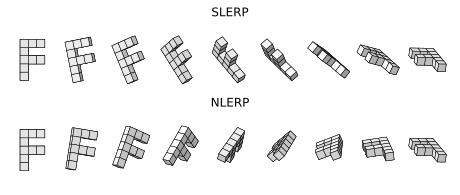

In [7]:
rotations = Rotation.from_euler('ZXY', [
    [0, 0, 0],
    [150, 10, 120],
], degrees=True)
slerp = Slerp([0, 1], rotations)
nlerp = Nlerp(*rotations)

In [8]:
times = np.linspace(0, 1, 11)

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 3), subplot_kw=dict(projection='dumb3d'))
ax1.set_title('SLERP')
plot_rotations(slerp(times).as_quat(), ax=ax1)
ax2.set_title('NLERP')
plot_rotations([nlerp(t).as_quat() for t in times], ax=ax2);

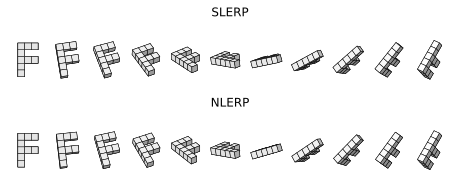

In [10]:
from IPython.display import HTML

In [11]:
times = np.linspace(0, 1, 100)

In [12]:
ani = animate_rotations({
    'Slerp': [slerp(t).as_quat() for t in times],
    'Nlerp': [nlerp(t).as_quat() for t in times],
}, figsize=(6, 3), interval=30)

In [13]:
display(HTML(ani.to_jshtml(default_mode='reflect')))